# IoT - Analytics
## Deep Analytics, Visualitzation and Modelling
### Evaluate Techniques for Wifi Locationing

### Index:

* [001 - Library import](#library_import)

* [002 - Data loading](#data_loading)

* [003 - Data exploration](#data_exploration)

* [004 - Data cleaning](#data_cleaning)

* [005 - Data exporting](#data_exporting)

### 001 - Library import <a id='library_import'></a>

In [1]:
import numpy as np
print ('Numpy: ', np.__version__)
import pandas as pd
print ('Pandas: ', pd.__version__)

%matplotlib inline

import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
print ('Matplotlib: ', mpl.__version__)

import sklearn as sk
from sklearn import preprocessing
print ('scikit-learn: ', sk.__version__)

Numpy:  1.16.3
Pandas:  0.23.4
Matplotlib:  3.0.3
scikit-learn:  0.21.0


### 002 - Data loading  <a id='data_loading'></a>

In [2]:
df_train = pd.read_csv("trainingData.csv")
df_valid = pd.read_csv("validationData.csv")
print('Data loading into the dataframe!')

Data loading into the dataframe!


### 003 - Data exploration <a id='data_exploration'></a>

In [3]:
print ('dimensions (rows, column)')
print ('train:', df_train.shape)
print ('valid:', df_valid.shape)

dimensions (rows, column)
train: (19937, 529)
valid: (1111, 529)


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19937 entries, 0 to 19936
Columns: 529 entries, WAP001 to TIMESTAMP
dtypes: float64(2), int64(527)
memory usage: 80.5 MB


In [5]:
df_train.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,...,100,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710


In [6]:
df_train.describe()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
count,19937.000000,19937.000000,19937.0,19937.0,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,...,19937.0,19937.000000,1.993700e+04,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,1.993700e+04
mean,99.823644,99.820936,100.0,100.0,99.613733,97.130461,94.733661,93.820234,94.693936,99.163766,...,100.0,-7464.275947,4.864871e+06,1.674575,1.212820,148.429954,1.833024,9.068014,13.021869,1.371421e+09
std,5.866842,5.798156,0.0,0.0,8.615657,22.931890,30.541335,33.010404,30.305084,12.634045,...,0.0,123.402010,6.693318e+01,1.223078,0.833139,58.342106,0.372964,4.988720,5.362410,5.572054e+05
min,-97.000000,-90.000000,100.0,100.0,-97.000000,-98.000000,-99.000000,-98.000000,-98.000000,-99.000000,...,100.0,-7691.338400,4.864746e+06,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.369909e+09
25%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7594.737000,4.864821e+06,1.000000,0.000000,110.000000,2.000000,5.000000,8.000000,1.371056e+09
50%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7423.060900,4.864852e+06,2.000000,1.000000,129.000000,2.000000,11.000000,13.000000,1.371716e+09
75%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7359.193000,4.864930e+06,3.000000,2.000000,207.000000,2.000000,13.000000,14.000000,1.371721e+09
max,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7300.818990,4.865017e+06,4.000000,2.000000,254.000000,2.000000,18.000000,24.000000,1.371738e+09


In [7]:
# The most common type for Floor and BuildingID
print (df_train[['FLOOR', 'BUILDINGID']].astype(str).describe(include=['object']))

        FLOOR BUILDINGID
count   19937      19937
unique      5          3
top         3          2
freq     5048       9492


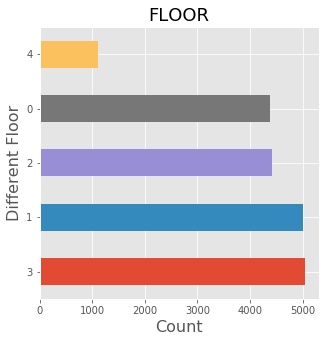

In [8]:
mpl.style.use('ggplot')
FLOOR_count = df_train['FLOOR'].value_counts()

FLOOR_count.plot(kind='barh', figsize=(5,5))
plt.title('FLOOR', fontsize=18)
plt.ylabel('Different Floor', fontsize=16)
plt.xlabel('Count', fontsize=16)

plt.savefig('./preprocessing/01_Floor.png', bbox_inches='tight')

plt.show()

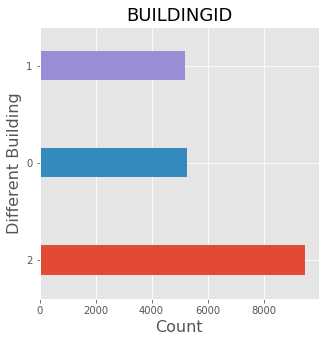

In [9]:
BUILDINGID_count = df_train['BUILDINGID'].value_counts()

BUILDINGID_count.plot(kind='barh', figsize=(5,5), width = 0.3)
plt.title('BUILDINGID', fontsize=18)
plt.ylabel('Different Building', fontsize=16)
plt.xlabel('Count', fontsize=16)

plt.savefig('./preprocessing/02_Building.png', bbox_inches='tight')

plt.show()

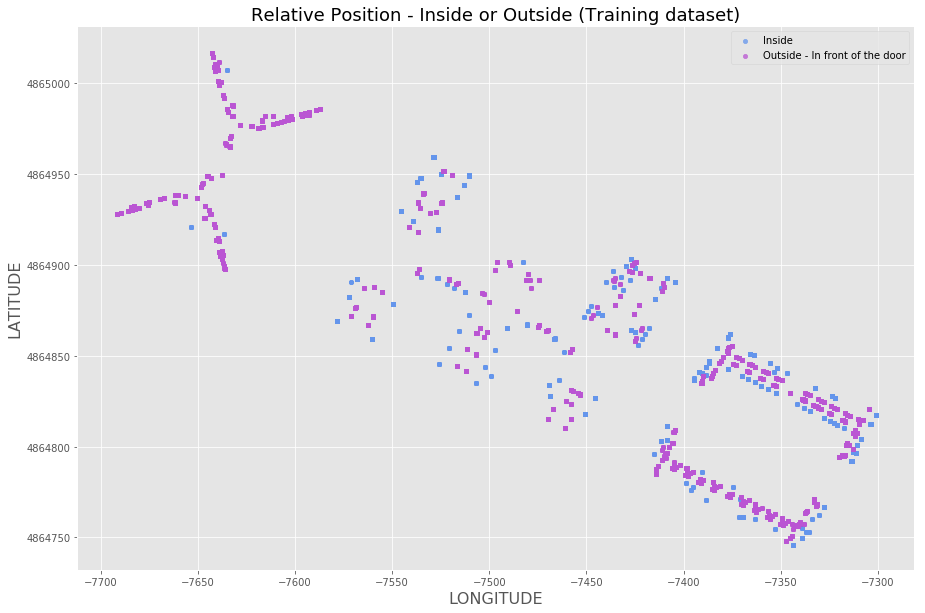

In [10]:
# Create subset for inside and outside
RePos01_in_train = df_train[df_train['RELATIVEPOSITION'] == 1]
RePos02_out_train = df_train[df_train['RELATIVEPOSITION'] == 2]

#colort = np.where(df_train["RELATIVEPOSITION"]==1,'darkblue','yellowgreen')
#colorv = np.where(df_valid["RELATIVEPOSITION"]==0,'darkblue','yellowgreen')

ax1 = RePos01_in_train.plot(kind='scatter', x="LONGITUDE", y="LATITUDE",
                    label = 'Inside',
                    color='cornflowerblue',
                    figsize=(15,10),
                    alpha=0.75)
ax2 = RePos02_out_train.plot(kind='scatter', x="LONGITUDE", y="LATITUDE",
                    label = 'Outside - In front of the door',
                    color="mediumorchid",
                    figsize=(15,10),
                    alpha=0.75,
                    ax=ax1)

plt.title('Relative Position - Inside or Outside (Training dataset)', fontsize=18)
plt.xlabel('LONGITUDE', fontsize=16)
plt.ylabel('LATITUDE', fontsize=16)
plt.legend(loc='best')

plt.savefig('./preprocessing/03_RelativePosition.png', bbox_inches='tight')

plt.show()

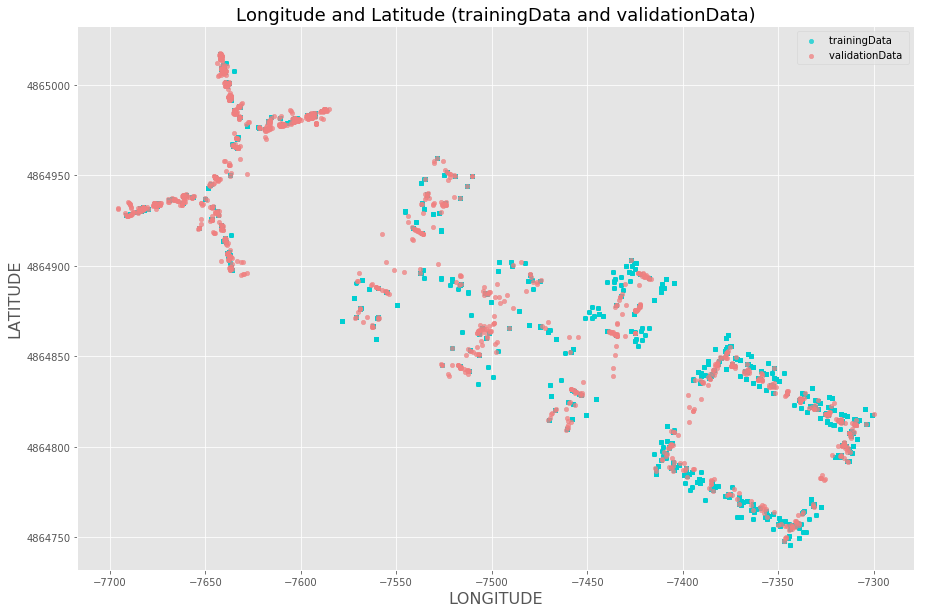

In [11]:
ax1 = df_train.plot(kind='scatter', x="LONGITUDE", y="LATITUDE",
                    label = 'trainingData ',
                    color="darkturquoise",
                    figsize=(15,10),
                    alpha=0.75)
ax2 = df_valid.plot(kind='scatter', x="LONGITUDE", y="LATITUDE",
                    label = 'validationData ',
                    color="lightcoral",
                    figsize=(15,10),
                    alpha=0.75,
                    ax=ax1)

plt.title("Longitude and Latitude (trainingData and validationData)", fontsize=18)
plt.xlabel('LONGITUDE', fontsize=16)
plt.ylabel('LATITUDE', fontsize=16)
plt.legend(loc='best')

plt.savefig('./preprocessing/04_LogLat.png', bbox_inches='tight')

plt.show()

In [12]:
# Training Data
df_train['WAP_COUNT'] = df_train[df_train.iloc[:,:-9] != 100 ].count(axis=1)
df_train.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP,WAP_COUNT
0,100,100,100,100,100,100,100,100,100,100,...,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733,17
1,100,100,100,100,100,100,100,100,100,100,...,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691,16
2,100,100,100,100,100,100,100,-97,100,100,...,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095,15
3,100,100,100,100,100,100,100,100,100,100,...,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807,16
4,100,100,100,100,100,100,100,100,100,100,...,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710,0


In [13]:
# Test Data
df_valid['WAP_COUNT'] = df_valid[df_valid.iloc[:,:-9] != 100 ].count(axis=1)
df_valid.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP,WAP_COUNT
0,100,100,100,100,100,100,100,100,100,100,...,-7515.916799,4.864890e+06,1,1,0,0,0,0,1380872703,1
1,100,100,100,100,100,100,100,100,100,100,...,-7383.867221,4.864840e+06,4,2,0,0,0,13,1381155054,12
2,100,100,100,100,100,100,100,100,100,100,...,-7374.302080,4.864847e+06,4,2,0,0,0,13,1381155095,10
3,100,100,100,100,100,100,100,100,100,100,...,-7365.824883,4.864843e+06,4,2,0,0,0,13,1381155138,10
4,100,100,100,100,100,100,100,100,100,100,...,-7641.499303,4.864922e+06,2,0,0,0,0,2,1380877774,14


In [14]:
# Create subset for each building
# Training Data
Bldg00_train = df_train[df_train['BUILDINGID'] == 0]
Bldg01_train = df_train[df_train['BUILDINGID'] == 1]
Bldg02_train = df_train[df_train['BUILDINGID'] == 2]
# Test Data
Bldg00_valid = df_valid[df_valid['BUILDINGID'] == 0]
Bldg01_valid = df_valid[df_valid['BUILDINGID'] == 1]
Bldg02_valid = df_valid[df_valid['BUILDINGID'] == 2]

<Figure size 432x288 with 0 Axes>

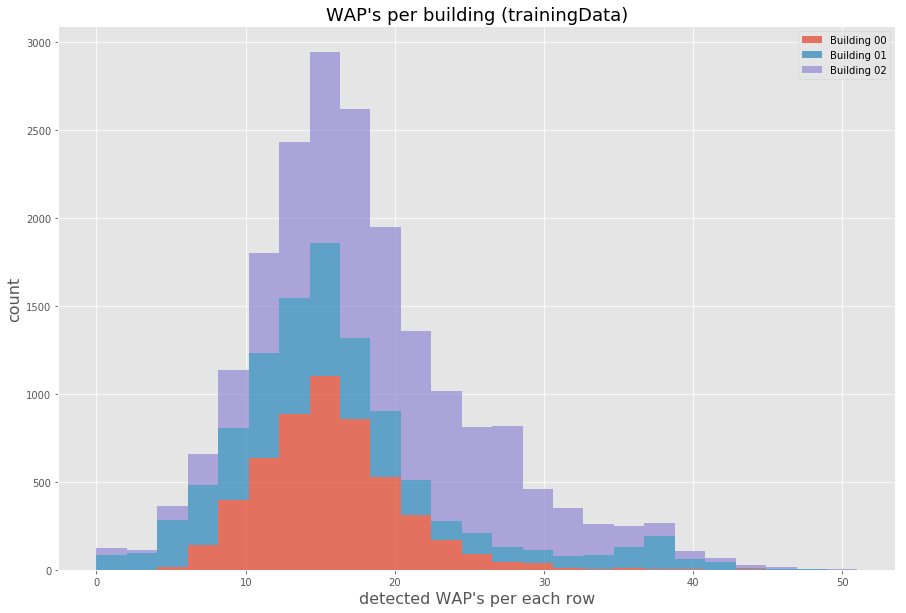

In [15]:
Bldg = pd.DataFrame({'Building 00': Bldg00_train['WAP_COUNT'],
                     'Building 01': Bldg01_train['WAP_COUNT'],
                     'Building 02': Bldg02_train['WAP_COUNT']},
                    columns=['Building 00',
                             'Building 01',
                             'Building 02'])

plt.figure();

Bldg.plot.hist(stacked=True,
               figsize=(15,10),
               alpha=0.75,
               bins=25)

plt.title("WAP's per building (trainingData)", fontsize=18)
plt.xlabel("detected WAP's per each row" , fontsize=16)
plt.ylabel('count', fontsize=16)
plt.legend(loc='best')

plt.savefig('./preprocessing/05_NumberWAP_train.png', bbox_inches='tight')

plt.show()

<Figure size 432x288 with 0 Axes>

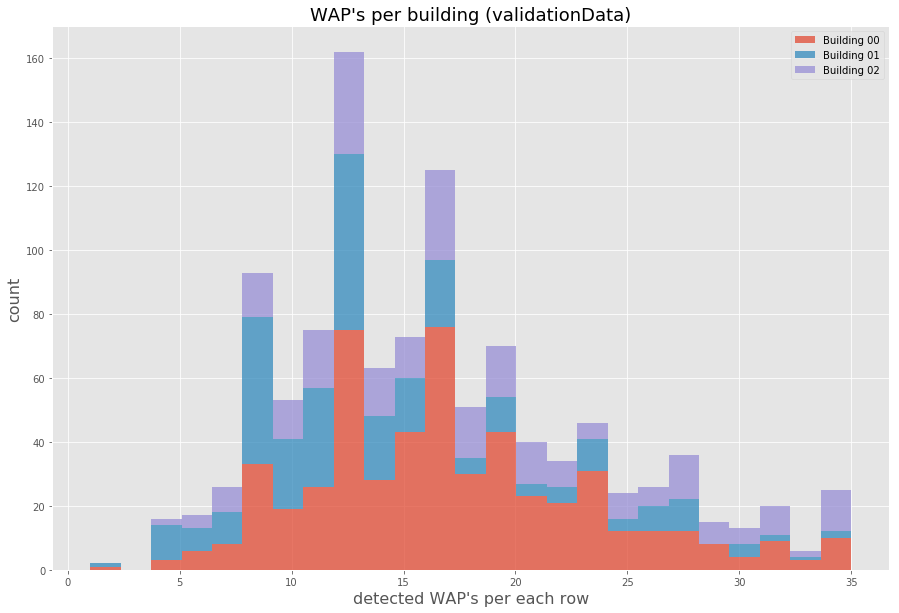

In [16]:
Bldg = pd.DataFrame({'Building 00': Bldg00_valid['WAP_COUNT'],
                     'Building 01': Bldg01_valid['WAP_COUNT'],
                     'Building 02': Bldg02_valid['WAP_COUNT']},
                    columns=['Building 00',
                             'Building 01',
                             'Building 02'])

plt.figure();

Bldg.plot.hist(stacked=True,
               figsize=(15,10),
               alpha=0.75,
               bins=25)

plt.title("WAP's per building (validationData)", fontsize=18)
plt.xlabel("detected WAP's per each row", fontsize=16)
plt.ylabel('count', fontsize=16)
plt.legend(loc='best')

plt.savefig('./preprocessing/06_NumberWAP_valid.png', bbox_inches='tight')

plt.show()

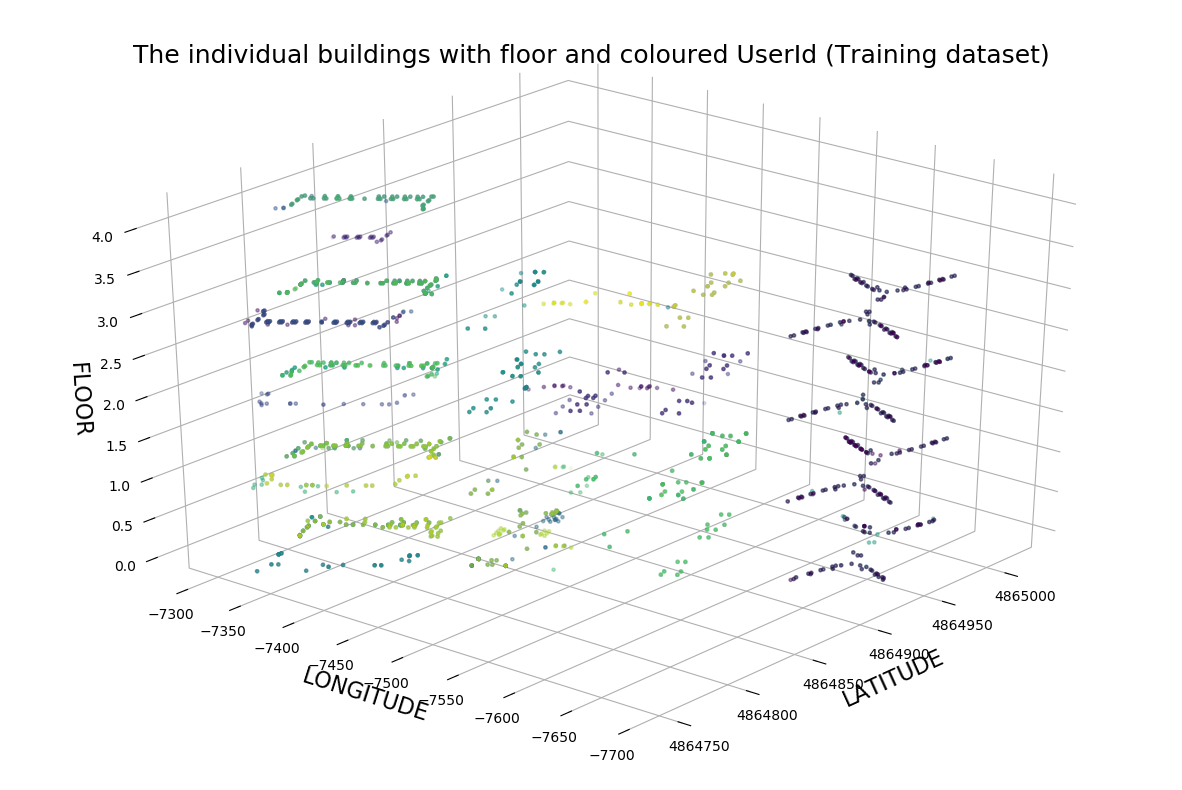

In [17]:
mpl.style.use('default')

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')

x = df_train['LATITUDE']
y = df_train['LONGITUDE']
z = df_train['FLOOR']
c = df_train['USERID']

ax.scatter(x, y, z, c=c, marker='o', s=5, alpha=0.05)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# Set rotation angle to -140 and 20 degrees
ax.view_init(azim=(-140))
ax.elev = 30


# Get rid of the panes
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

# Get rid of the spines
ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))



# Add the labels
ax.set_title("The individual buildings with floor and coloured UserId (Training dataset)", fontsize=18)
ax.set_xlabel("LATITUDE", fontsize=16)
ax.set_ylabel("LONGITUDE", fontsize=16)
ax.set_zlabel("FLOOR", fontsize=16)

plt.savefig('./preprocessing/07_BldgFlScatter.png', bbox_inches='tight')

plt.show()

### 004 - Data cleaning <a id='data_cleaning'></a>

In [18]:
print ('dimensions (rows, column)')
print ('train:', df_train.shape)
print ('valid:', df_valid.shape)

df_valid_clean = df_valid

dimensions (rows, column)
train: (19937, 530)
valid: (1111, 530)


In [19]:
# identification of the WAP columns with only 100 Signal Strengh 
print ('WAP columns with only 100')
print ('dimensions (rows, column)')

# Training dataset
df_train_column_select = np.sum(df_train, axis=0)
df_train_column_select = df_train_column_select[df_train_column_select == 1993700]
print ('train:', df_train_column_select.count())

# Test dataset
df_valid_column_select = np.sum(df_valid,axis=0)
df_valid_column_select = df_valid_column_select[df_valid_column_select == 111100]
print ('valid:', df_valid_column_select.count())

WAP columns with only 100
dimensions (rows, column)
train: 55
valid: 153


In [20]:
# identification of the WAP rows with only 100 Signal Strengh 
print ('WAP rows with only 100')
print ('dimensions (rows, column)')

# Training dataset
df_train_row_select = df_train.iloc[:,:-10]
df_train_row_select = np.sum(df_train_row_select, axis=1)
df_train_row_select = df_train_row_select[df_train_row_select == 52000]
print ('train:', df_train_row_select.count())

# Test dataset
df_valid_row_select = df_valid.iloc[:,:-10]
df_valid_row_select = np.sum(df_valid_row_select, axis=1)
df_valid_row_select = df_valid_row_select[df_valid_row_select == 52000]
print ('valid:', df_valid_row_select.count())

WAP rows with only 100
dimensions (rows, column)
train: 76
valid: 0


In [21]:
# remove of the columns
print ('remove of the columns')
print ('dimensions (rows, column)')

# Training dataset
df_train_clean = df_train[df_train.columns[df_train.sum() != 1993700]]
print ('train:', df_train_clean.shape)

remove of the columns
dimensions (rows, column)
train: (19937, 475)


In [22]:
# remove of the rows
print ('remove of the rows')
print ('dimensions (rows, column)')

# Training dataset
df_train_row_clean_select = df_train_clean.iloc[:,:-9]
df_train_row_clean_select
df_train_clean['rows'] = np.sum(df_train_row_clean_select, axis=1)
df_train_clean
df_train_clean = df_train_clean.drop(df_train_clean.index[df_train_clean.rows == 46500])
df_train_clean.drop('rows', axis=1, inplace=True)
print ('train:', df_train_clean.shape)

remove of the rows
dimensions (rows, column)
train: (19937, 475)


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [23]:
# remove the duplicate rows
print ('remove of the duplicate rows')
print ('dimensions (rows, column)')

# Training dataset
df_train_clean = df_train_clean.drop_duplicates()
print ('train:', df_train_clean.shape)

# Test dataset
df_valid_clean = df_valid_clean.drop_duplicates()
print ('valid:', df_valid_clean.shape)

remove of the duplicate rows
dimensions (rows, column)
train: (19300, 475)
valid: (1111, 530)


In [24]:
# create a column with variance of the WAP's

# Training dataset
COLUMN_NAMES=[]
df_train_var = pd.DataFrame(columns=COLUMN_NAMES)
df_train_var['variance'] = df_train_clean.var(axis=0)
print('train:', df_train_var.head())

train:           variance
WAP001   35.554872
WAP002   34.727169
WAP005   76.674552
WAP006  542.948201
WAP007  962.615466


In [25]:
# transpose the column with row

# Training dataset
df_train_var_trans = df_train_var.T
df_train_var_trans = df_train_var_trans.astype('int')
# df_train_var_trans.head()

In [26]:
# set your variance threshold (less than 20 - it give us 1 or 0 as result) and combine it with the main dataset

# Training dataset
df_train_var_trans = df_train_var_trans.iloc[-1:,:] < 20
df_train_combine = pd.concat([df_train_var_trans, df_train_clean], sort=False)
# df_train_combine.head()

In [27]:
# replace all 1 with NaN

# Training dataset
df_train_combine.iloc[:,:-9] = df_train_combine.replace(to_replace=1, value=np.nan)
# df_train_combine.head()

In [28]:
# remove all column with NaN

# Training dataset
df_train_combine.dropna(axis=1, inplace = True)
# df_train_combine.head()

In [29]:
# remove column variance

# Training dataset
df_train_combine = df_train_combine.drop(df_train_combine.index[0])
# df_train_combine.head()

In [30]:
df_train_clean = df_train_combine
# df_valid_clean = df_valid_combine

In [31]:
# changing the Timeformat

# Training dataset
df_train_clean['TIMESTAMP'] = pd.to_datetime(df_train_clean['TIMESTAMP'], unit='s')
df_train_clean.head()

,WAP001,WAP002,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,...,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP,WAP_COUNT
0,100,100,100,100,100,100,100,100,100,100,...,-7541.2643,4.864921e+06,2,1,106,2,2,23,2013-06-20 07:35:33,17
1,100,100,100,100,100,100,100,100,100,100,...,-7536.6212,4.864934e+06,2,1,106,2,2,23,2013-06-20 07:34:51,16
2,100,100,100,100,100,-97,100,100,100,100,...,-7519.1524,4.864950e+06,2,1,103,2,2,23,2013-06-20 07:41:35,15
3,100,100,100,100,100,100,100,100,100,100,...,-7524.5704,4.864934e+06,2,1,102,2,2,23,2013-06-20 07:36:47,16
4,100,100,100,100,100,100,100,100,100,100,...,-7632.1436,4.864982e+06,0,0,122,2,11,13,2013-05-30 10:28:30,0


In [32]:
# Test dataset
df_valid_clean['TIMESTAMP'] = pd.to_datetime(df_valid_clean['TIMESTAMP'], unit='s')
df_valid_clean.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP,WAP_COUNT
0,100,100,100,100,100,100,100,100,100,100,...,-7515.916799,4.864890e+06,1,1,0,0,0,0,2013-10-04 07:45:03,1
1,100,100,100,100,100,100,100,100,100,100,...,-7383.867221,4.864840e+06,4,2,0,0,0,13,2013-10-07 14:10:54,12
2,100,100,100,100,100,100,100,100,100,100,...,-7374.302080,4.864847e+06,4,2,0,0,0,13,2013-10-07 14:11:35,10
3,100,100,100,100,100,100,100,100,100,100,...,-7365.824883,4.864843e+06,4,2,0,0,0,13,2013-10-07 14:12:18,10
4,100,100,100,100,100,100,100,100,100,100,...,-7641.499303,4.864922e+06,2,0,0,0,0,2,2013-10-04 09:09:34,14


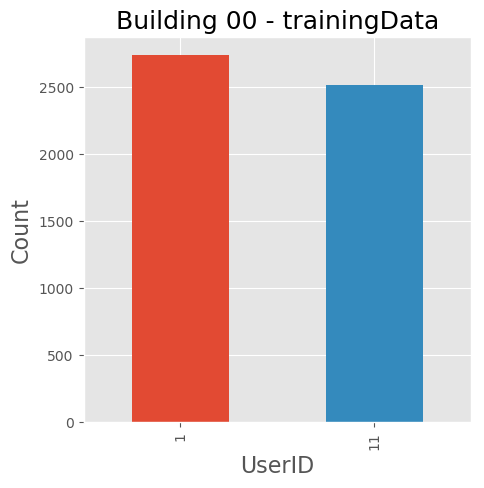

In [33]:
# Create dataset for each building
# Training Data
Bldg00_train = df_train_clean[df_train_clean['BUILDINGID'] == 0]
Bldg01_train = df_train_clean[df_train_clean['BUILDINGID'] == 1]
Bldg02_train = df_train_clean[df_train_clean['BUILDINGID'] == 2]

mpl.style.use('ggplot')

USERID_Bldg00_count = Bldg00_train['USERID'].value_counts()

USERID_Bldg00_count.plot(kind='bar', figsize=(5,5))
plt.title('Building 00 - trainingData', fontsize=18)
plt.ylabel('Count', fontsize=16)
plt.xlabel('UserID', fontsize=16)

plt.savefig('./preprocessing/08_Bldg00User.png', bbox_inches='tight')

plt.show()

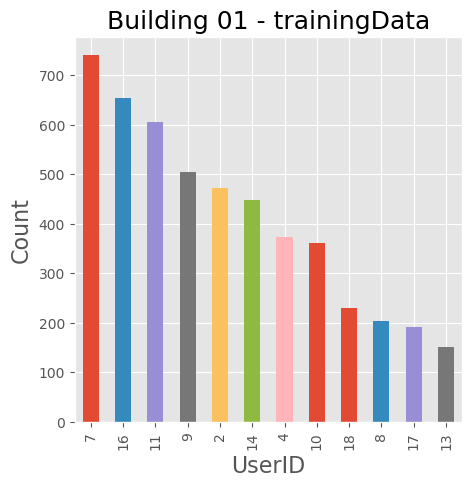

In [34]:
USERID_Bldg01_count = Bldg01_train['USERID'].value_counts()

USERID_Bldg01_count.plot(kind='bar', figsize=(5,5))
plt.title('Building 01 - trainingData', fontsize=18)
plt.ylabel('Count', fontsize=16)
plt.xlabel('UserID', fontsize=16)

plt.savefig('./preprocessing/09_Bldg01User.png', bbox_inches='tight')

plt.show()

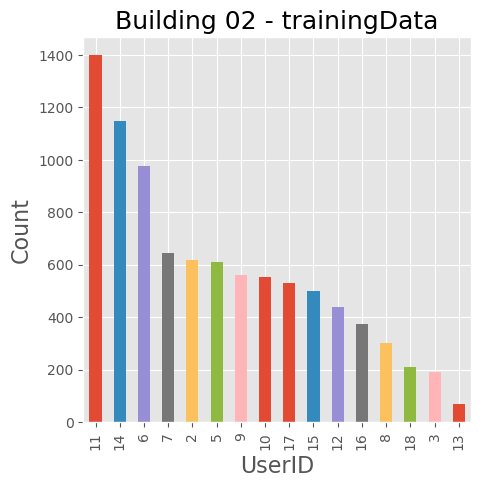

In [35]:
USERID_Bldg02_count = Bldg02_train['USERID'].value_counts()

USERID_Bldg02_count.plot(kind='bar', figsize=(5,5))
plt.title('Building 02 - trainingData', fontsize=18)
plt.ylabel('Count', fontsize=16)
plt.xlabel('UserID', fontsize=16)

plt.savefig('./preprocessing/10_Bldg02User.png', bbox_inches='tight')

plt.show()

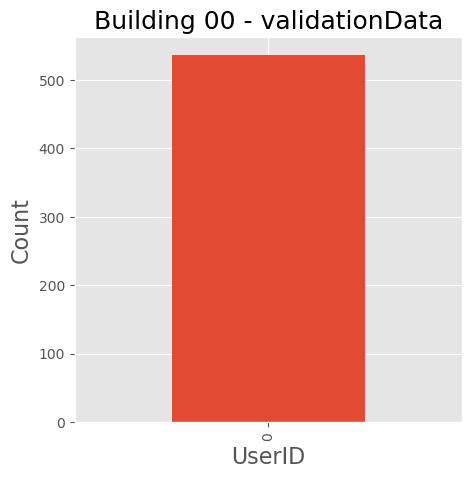

In [36]:
# Create subset for each building

# Test Data
Bldg00_valid = df_valid_clean[df_valid_clean['BUILDINGID'] == 0]
Bldg01_valid = df_valid_clean[df_valid_clean['BUILDINGID'] == 1]
Bldg02_valid = df_valid_clean[df_valid_clean['BUILDINGID'] == 2]

USERID_Bldg00_count = Bldg00_valid['USERID'].value_counts()

USERID_Bldg00_count.plot(kind='bar', figsize=(5,5))
plt.title('Building 00 - validationData', fontsize=18)
plt.ylabel('Count', fontsize=16)
plt.xlabel('UserID', fontsize=16)

plt.savefig('./preprocessing/11_Bldg00User.png', bbox_inches='tight')

plt.show()

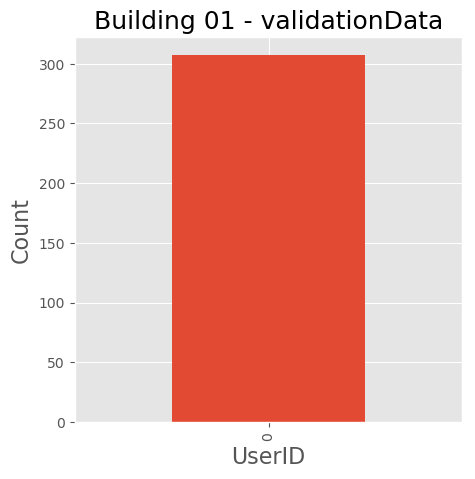

In [37]:
USERID_Bldg01_count = Bldg01_valid['USERID'].value_counts()

USERID_Bldg01_count.plot(kind='bar', figsize=(5,5))
plt.title('Building 01 - validationData', fontsize=18)
plt.ylabel('Count', fontsize=16)
plt.xlabel('UserID', fontsize=16)

plt.savefig('./preprocessing/12_Bldg01User.png', bbox_inches='tight')

plt.show()

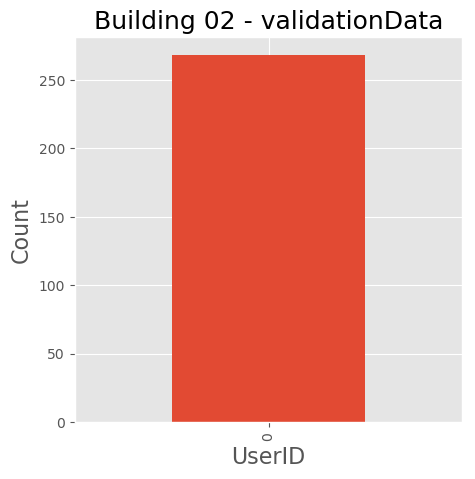

In [38]:
USERID_Bldg02_count = Bldg02_valid['USERID'].value_counts()

USERID_Bldg02_count.plot(kind='bar', figsize=(5,5))
plt.title('Building 02 - validationData', fontsize=18)
plt.ylabel('Count', fontsize=16)
plt.xlabel('UserID', fontsize=16)

plt.savefig('./preprocessing/13_Bldg02User.png', bbox_inches='tight')

plt.show()

In [39]:
# Change WAP values so that no signal is 0 and highest signal is 104
# Training Data
df_train_clean.iloc[:, :-10] = np.where(df_train_clean.iloc[:, :-10] <= 0,
                                        df_train_clean.iloc[:, :-10] + 105,
                                        df_train_clean.iloc[:, :-10] - 100)
df_train_clean.head()

,WAP001,WAP002,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,...,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP,WAP_COUNT
0,0,0,0,0,0,0,0,0,0,0,...,-7541.2643,4.864921e+06,2,1,106,2,2,23,2013-06-20 07:35:33,17
1,0,0,0,0,0,0,0,0,0,0,...,-7536.6212,4.864934e+06,2,1,106,2,2,23,2013-06-20 07:34:51,16
2,0,0,0,0,0,8,0,0,0,0,...,-7519.1524,4.864950e+06,2,1,103,2,2,23,2013-06-20 07:41:35,15
3,0,0,0,0,0,0,0,0,0,0,...,-7524.5704,4.864934e+06,2,1,102,2,2,23,2013-06-20 07:36:47,16
4,0,0,0,0,0,0,0,0,0,0,...,-7632.1436,4.864982e+06,0,0,122,2,11,13,2013-05-30 10:28:30,0


In [40]:
# Test data
df_valid_clean.iloc[:, :-10] = np.where(df_valid_clean.iloc[:, :-10] <= 0,
                                        df_valid_clean.iloc[:, :-10] + 105,
                                        df_valid_clean.iloc[:, :-10] - 100)
df_valid_clean.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP,WAP_COUNT
0,0,0,0,0,0,0,0,0,0,0,...,-7515.916799,4.864890e+06,1,1,0,0,0,0,2013-10-04 07:45:03,1
1,0,0,0,0,0,0,0,0,0,0,...,-7383.867221,4.864840e+06,4,2,0,0,0,13,2013-10-07 14:10:54,12
2,0,0,0,0,0,0,0,0,0,0,...,-7374.302080,4.864847e+06,4,2,0,0,0,13,2013-10-07 14:11:35,10
3,0,0,0,0,0,0,0,0,0,0,...,-7365.824883,4.864843e+06,4,2,0,0,0,13,2013-10-07 14:12:18,10
4,0,0,0,0,0,0,0,0,0,0,...,-7641.499303,4.864922e+06,2,0,0,0,0,2,2013-10-04 09:09:34,14


In [41]:
# Convert Longitude and Latitude values to absolute values
# Training Data
df_train_clean['ABSOLUTE_LONGITUDE'] = df_train_clean['LONGITUDE'] - df_train_clean['LONGITUDE'].min()
df_train_clean['ABSOLUTE_LATITUDE'] = df_train_clean['LATITUDE'] - df_train_clean['LATITUDE'].min()
df_train_clean.head()

,WAP001,WAP002,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,...,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP,WAP_COUNT,ABSOLUTE_LONGITUDE,ABSOLUTE_LATITUDE
0,0,0,0,0,0,0,0,0,0,0,...,2,1,106,2,2,23,2013-06-20 07:35:33,17,150.0741,175.033184
1,0,0,0,0,0,0,0,0,0,0,...,2,1,106,2,2,23,2013-06-20 07:34:51,16,154.7172,188.480184
2,0,0,0,0,0,8,0,0,0,0,...,2,1,103,2,2,23,2013-06-20 07:41:35,15,172.1860,203.787184
3,0,0,0,0,0,0,0,0,0,0,...,2,1,102,2,2,23,2013-06-20 07:36:47,16,166.7680,188.347984
4,0,0,0,0,0,0,0,0,0,0,...,0,0,122,2,11,13,2013-05-30 10:28:30,0,59.1948,236.472084


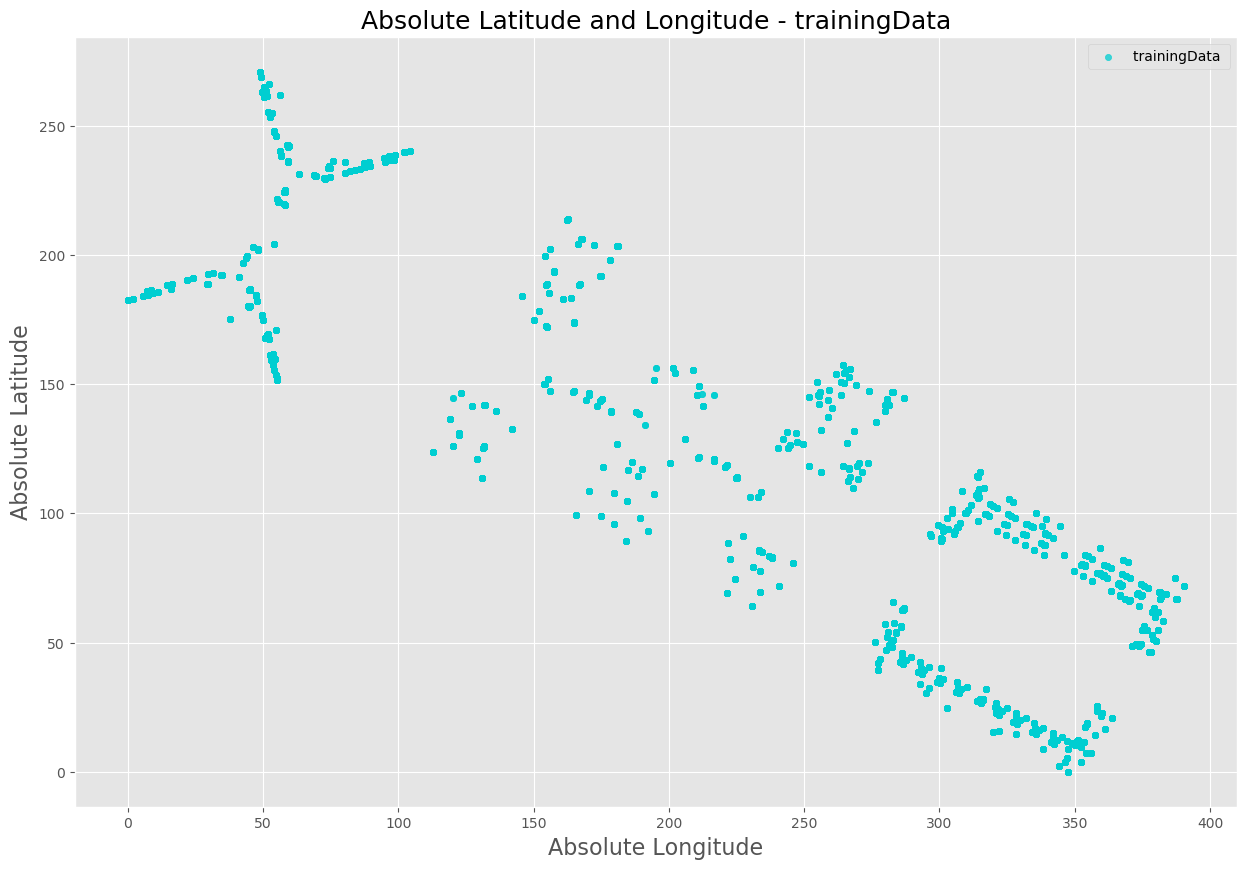

In [42]:
df_train_clean.plot(kind='scatter', x="ABSOLUTE_LONGITUDE", y="ABSOLUTE_LATITUDE",
                    label = 'trainingData ',
                    color='darkturquoise',
                    figsize=(15,10),
                    alpha=0.75)

plt.title('Absolute Latitude and Longitude - trainingData', fontsize=18)
plt.ylabel('Absolute Latitude', fontsize=16)
plt.xlabel('Absolute Longitude', fontsize=16)

plt.savefig('./preprocessing/14_LonLatAbsValues.png', bbox_inches='tight')

plt.show()

In [43]:
# Test Data
df_valid_clean['ABSOLUTE_LONGITUDE'] = df_valid_clean['LONGITUDE'] - df_valid_clean['LONGITUDE'].min()
df_valid_clean['ABSOLUTE_LATITUDE'] = df_valid_clean['LATITUDE'] - df_valid_clean['LATITUDE'].min()
df_valid_clean.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP,WAP_COUNT,ABSOLUTE_LONGITUDE,ABSOLUTE_LATITUDE
0,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,2013-10-04 07:45:03,1,180.021956,141.647431
1,0,0,0,0,0,0,0,0,0,0,...,4,2,0,0,0,13,2013-10-07 14:10:54,12,312.071534,91.724822
2,0,0,0,0,0,0,0,0,0,0,...,4,2,0,0,0,13,2013-10-07 14:11:35,10,321.636675,98.518237
3,0,0,0,0,0,0,0,0,0,0,...,4,2,0,0,0,13,2013-10-07 14:12:18,10,330.113872,94.813768
4,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,2,2013-10-04 09:09:34,14,54.439452,174.383692


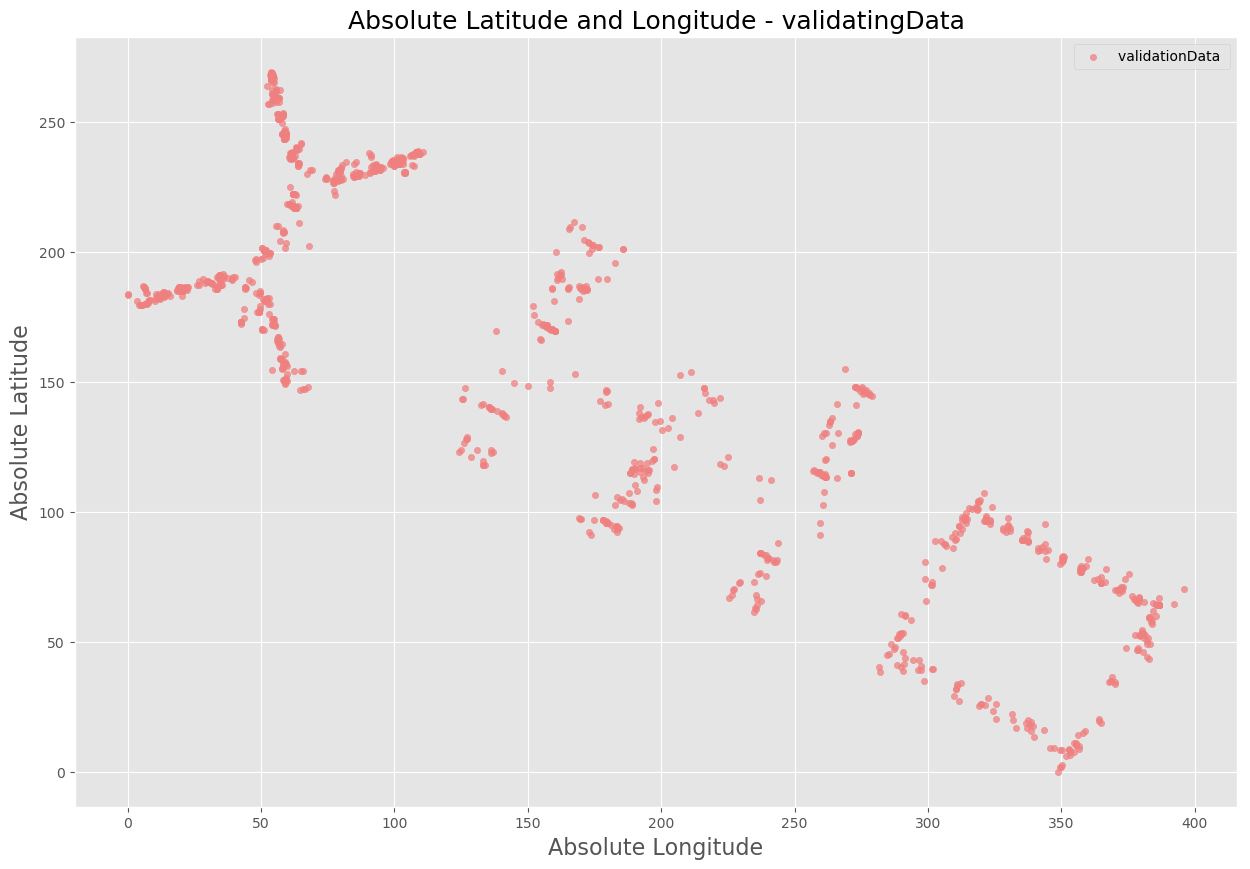

In [44]:
df_valid_clean.plot(kind='scatter', x="ABSOLUTE_LONGITUDE", y="ABSOLUTE_LATITUDE",
                    label = 'validationData ',
                    color='lightcoral',
                    figsize=(15,10),
                    alpha=0.75)

plt.title('Absolute Latitude and Longitude - validatingData', fontsize=18)
plt.ylabel('Absolute Latitude', fontsize=16)
plt.xlabel('Absolute Longitude', fontsize=16)

plt.savefig('./preprocessing/15_LonLatAbsValues.png', bbox_inches='tight')

plt.show()

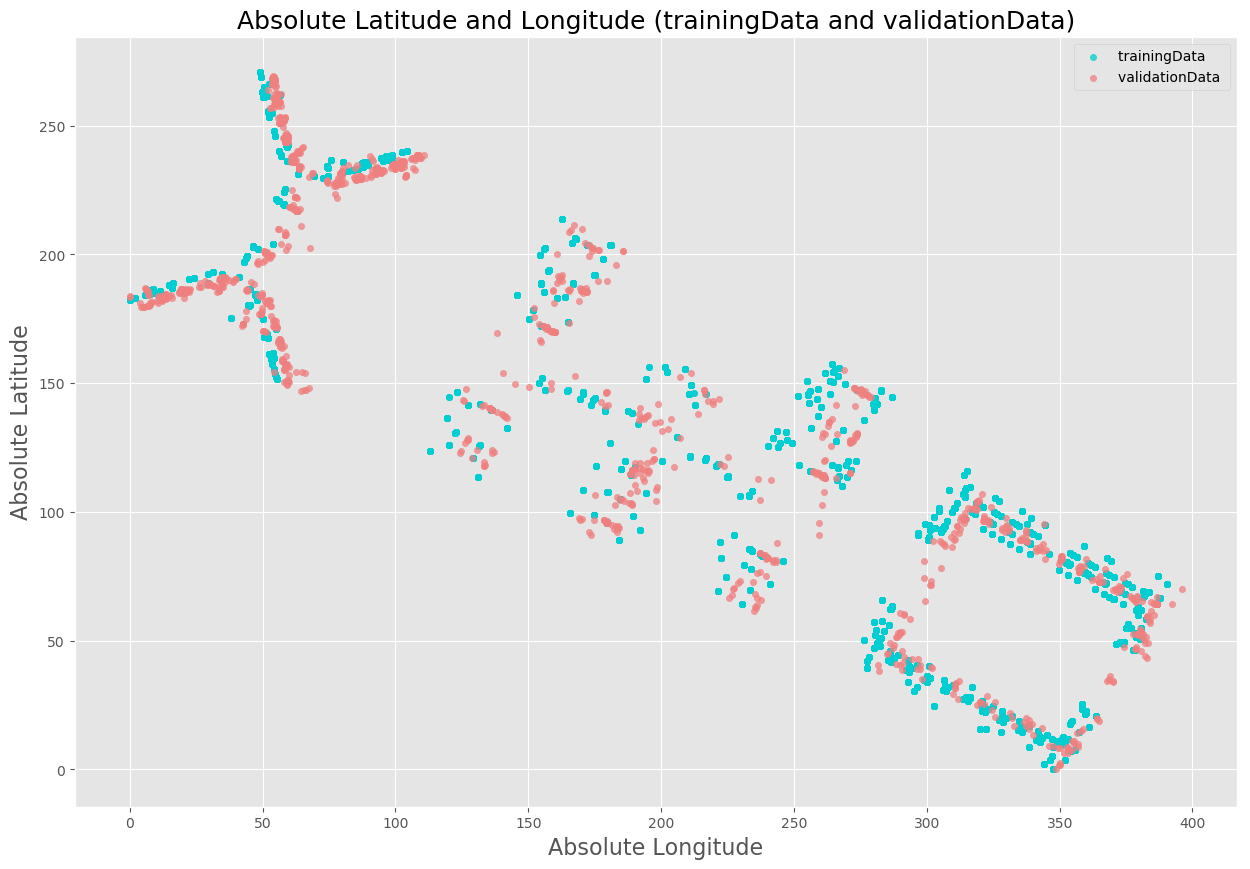

In [45]:
ax1 = df_train_clean.plot(kind='scatter', x="ABSOLUTE_LONGITUDE", y="ABSOLUTE_LATITUDE",
                          label = 'trainingData ',
                          color="darkturquoise",
                          figsize=(15,10),
                          alpha=0.75)

ax2 = df_valid_clean.plot(kind='scatter', x="ABSOLUTE_LONGITUDE", y="ABSOLUTE_LATITUDE",
                          label = 'validationData ',
                          color="lightcoral",
                          figsize=(15,10),
                          alpha=0.75,
                          ax=ax1)

plt.title("Absolute Latitude and Longitude (trainingData and validationData)", fontsize=18)
plt.xlabel('Absolute Longitude', fontsize=16)
plt.ylabel('Absolute Latitude', fontsize=16)
plt.legend(loc='best')

plt.savefig('./preprocessing/16_LonLatAbsValues.png', bbox_inches='tight')

plt.show()

In [46]:
# check maximum values for longitude and latitude in training and test sets
print ('maximum values for longitude and latitude')
print (df_train_clean['ABSOLUTE_LONGITUDE'].max())
print (df_valid_clean['ABSOLUTE_LONGITUDE'].max())

#remove all rows where LONGITUDE values from test set that are higher than in train set

print ('remove all rows with higher values')
print ('dimensions (rows, column)')
print ('befor:', df_valid_clean.shape)
df_valid_clean = df_valid_clean[df_valid_clean.ABSOLUTE_LONGITUDE < 390.5194099061191]
print ('after:', df_valid_clean.shape)

maximum values for longitude and latitude
390.5194099061191
396.15223819905714
remove all rows with higher values
dimensions (rows, column)
befor: (1111, 532)
after: (1109, 532)


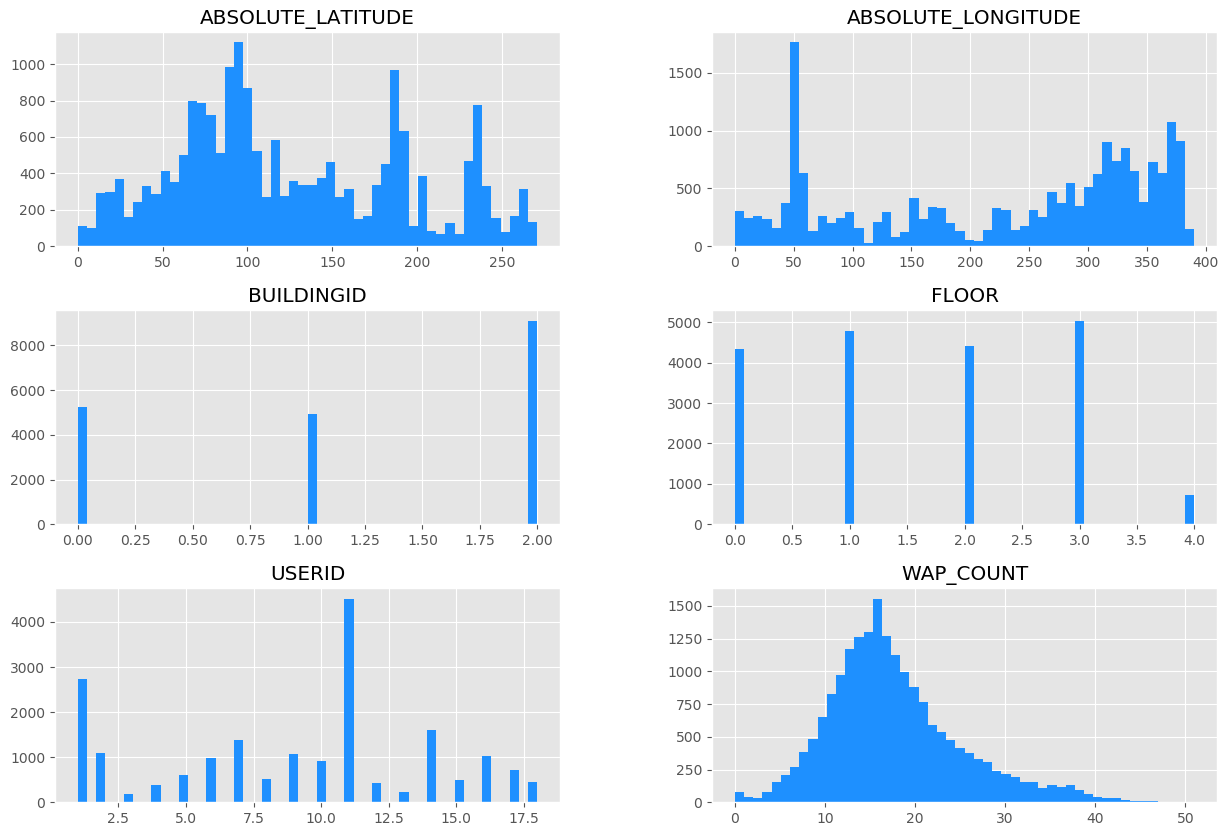

In [47]:
df_train_plot = df_train_clean.drop(['LONGITUDE', 'LATITUDE', 'SPACEID', 'RELATIVEPOSITION', 'PHONEID', 'TIMESTAMP'], axis=1)

# plot the histograms of the attributes
df_train_plot.iloc[:,384:].hist(bins=50, figsize=(15,10), color='dodgerblue')
plt.savefig('./preprocessing/17_distribution.png', bbox_inches='tight')
plt.show()

### 005 - Data exporting <a id='data_exporting'></a>

In [48]:
df_train_clean.to_csv('trainingData_clean.csv', index=False)
df_valid_clean.to_csv('validationData_clean.csv', index=False)
print('Data exporting into the CSV file!')

Data exporting into the CSV file!
